# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## <font color= 'darkorchid'> Observations: </font>
### 1. Weather appears to get <font color ='orangered'> warmer </font> as you approach the equator.
### 2. There's not really a discernable relationship between <font color ='olivedrab'> latitude </font> and <font color ='orange'> humidity </font> or <font color ='olivedrab'> latitude </font> and <font color ='mediumaquamarine'> cloudiness.</font>
### 3. There is a slightly inverted normal distribution between <font color ='mediumaquamarine'> wind speed </font> and <font color ='olivedrab'> latitude. </font>

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv as csv
import time
from scipy.stats import linregress
from citipy import citipy

#found these useful for time calculations 
import time
import datetime
import os

# Import API key
from config import OWN_API_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [89]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print('This code has generated {} random cities.'.format(len(set(cities))))

This code has generated 290 random cities.


In [93]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [94]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + OWN_API_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 2
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
        
    except (KeyError):
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | lesnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 2 of set 0 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
City not found!
Processing record 3 of set 0 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 4 of set 0 | dombas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 5 of set 0 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 6 of set 0 | blythe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 7 of set 0 | albany
http://api.openweathermap.or

Processing record 9 of set 2 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 10 of set 2 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 11 of set 2 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 12 of set 2 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
City not found!
Processing record 13 of set 2 | lyubech
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 14 of set 2 | talcahuano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 15 of set 2 | owatonna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a

Processing record 17 of set 4 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 18 of set 4 | kozhevnikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 19 of set 4 | zalari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 20 of set 4 | vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 21 of set 4 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 22 of set 4 | turtkul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
City not found!
Processing record 23 of set 4 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c

Processing record 24 of set 6 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 25 of set 6 | yokadouma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 26 of set 6 | point fortin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 27 of set 6 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 28 of set 6 | kedougou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 29 of set 6 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 30 of set 6 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processin

Processing record 30 of set 8 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 31 of set 8 | bento goncalves
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 32 of set 8 | pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 33 of set 8 | half moon bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 34 of set 8 | ajdabiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 35 of set 8 | razole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be7793
Processing record 36 of set 8 | chumikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1202627258a447c532d1481a9be

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [97]:
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Max Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          264
Cloudiness    264
Country       264
Date          264
Humidity      264
Max Temp      264
Lat           264
Lng           264
Wind Speed    264
dtype: int64

In [98]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Max Temp,Lat,Lng,Wind Speed
0,lesnoye,100,RU,1579466463,86,36.88,58.28,35.52,12.41
1,tiksi,100,RU,1579466463,85,-3.12,71.69,128.87,8.57
2,dombas,100,NO,1579466463,84,14.85,62.07,9.12,5.32
3,nanortalik,100,GL,1579466221,83,24.04,60.14,-45.24,27.58
4,blythe,1,US,1579466323,15,68.00,33.61,-114.60,10.29


In [107]:
#exporting data to csv file
weather_data.to_csv("weather_vacation_output.csv")



### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [108]:
#calculating data
date =datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')

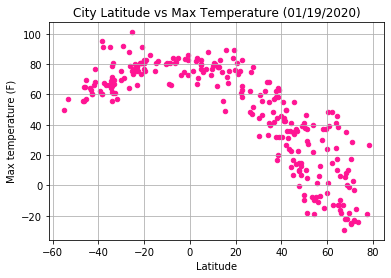

In [112]:
# Latitude Vs Temperature Plot

weather_data.plot(kind='scatter', x='Lat', y='Max Temp', c='deeppink')
plt.title('City Latitude vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("LatitudeVsTemperature.png")

#### Latitude vs. Humidity Plot

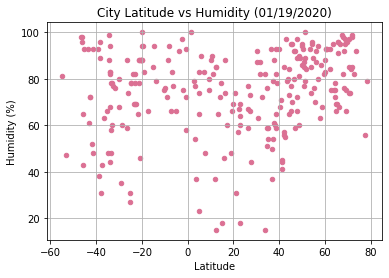

In [115]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='palevioletred')
plt.title('City Latitude vs Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("LatitudeVsHumidity.png")

#### Latitude vs. Cloudiness Plot

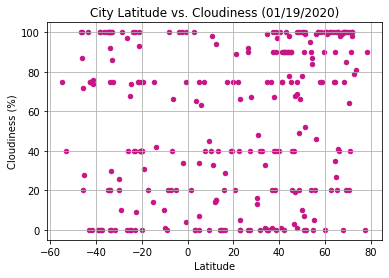

In [116]:
# Latitude Vs Cloudiness

weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='mediumvioletred')
plt.title('City Latitude vs. Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("LatitudeVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

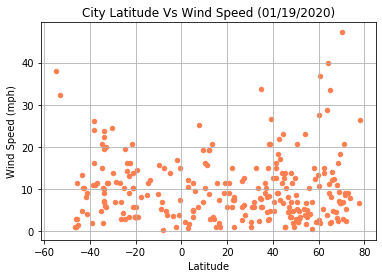

In [118]:
# Latitude Vs Wind Speed

weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='coral')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("LatitudeVsWindSpeed.png")